In [ ]:
import os 
import glob
from skimage import io                                                       
from skimage.color import rgb2gray, rgb2grey                                           
from skimage.filters import threshold_yen, threshold_isodata, threshold_li, threshold_mean, threshold_minimum, threshold_otsu, threshold_triangle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Using Frame 1 images to find suitable threshold

In [ ]:
path = "/content/F1_JHV_2022-04-06_23.34.44"
if (os.path.exists(path)==False):
  os.mkdir(path)

In [ ]:
#splitting video into image frames 
import cv2
vidcap = cv2.VideoCapture("/content/F1_JHV_2022-04-06_23.34.44.mp4")
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite(os.path.join(path , "frame%d.jpg" % count), image)  # save frame as JPEG file into designated folder        
  success,image = vidcap.read()
  #print('Read a new frame: ', success)
  count += 1

In [ ]:
#change path to folder with all images 
os.getcwd()
os.chdir(path)
os.getcwd()

'/content/F1_JHV_2022-04-06_23.34.44'

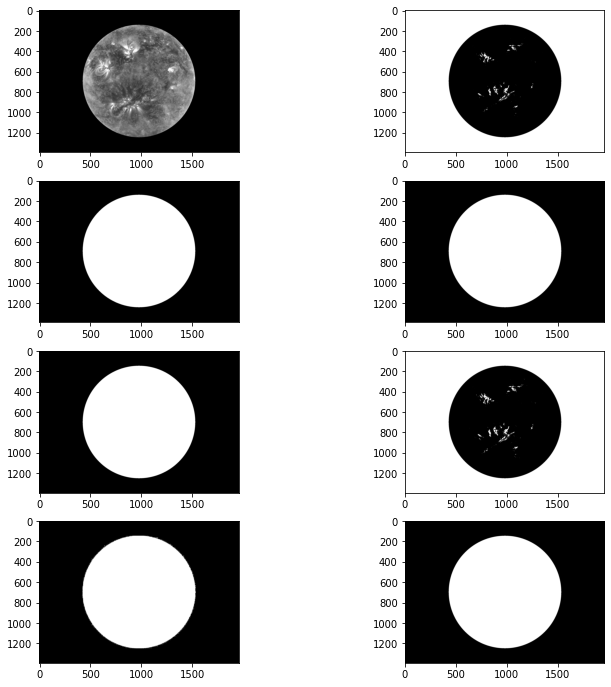

In [ ]:
#checking for suitable filters 
#threshold_yen for active areas 
#threshold_li/threshold_triangle for the whole area of the sun
#Note: white area (within range of threshold), black area (outside range of threshold)
img = io.imread("frame20.jpg")
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize=(12,12))
ax = ax.flatten()
img_grey = rgb2gray(img)

#original grey image 
ax[0].imshow(img_grey,cmap='gray')

#threshold_isodata 
t_isodata = threshold_isodata(img_grey)
img_isodata = img_grey < t_isodata 
ax[1].imshow(img_isodata,cmap='gray')

#threshold_li
t_li = threshold_li(img_grey)
img_li = img_grey > t_li
ax[2].imshow(img_li,cmap='gray')

#threshold mean
t_mean = threshold_mean(img_grey)
img_mean = img_grey > t_mean
ax[3].imshow(img_mean,cmap='gray')

#threshold minimum 
t_min = threshold_minimum(img_grey)
img_min = img_grey > t_min
ax[4].imshow(img_min,cmap='gray')

#threshold otsu
t_otsu = threshold_otsu(img_grey)
img_otsu = img_grey < t_otsu
ax[5].imshow(img_otsu,cmap='gray')

#threshold triangle 
t_triangle = threshold_triangle(img_grey)
img_triangle = img_grey > t_triangle
ax[6].imshow(img_triangle,cmap='gray')

#threshold yen
t_yen = threshold_yen(img_grey) + 0.13 #for better thresholding
img_yen = img_grey > t_yen
ax[7].imshow(img_yen,cmap='gray')

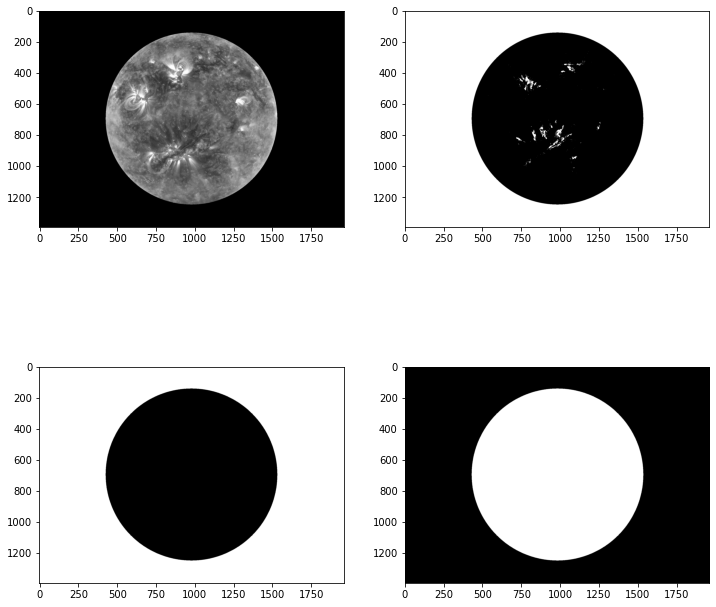

In [ ]:
#Suitable filters found 
img = io.imread("frame20.jpg")
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(12,12))
ax = ax.flatten()
img_grey = rgb2gray(img)

#original grey image 
ax[0].imshow(img_grey,cmap='gray')

#threshold_isodata 
t_isodata = threshold_isodata(img_grey)
img_isodata = img_grey < t_isodata 
ax[1].imshow(img_isodata,cmap='gray')

#threshold_li (for background)
ti_li =threshold_li(img_grey)
img_li = img_grey < t_li
ax[2].imshow(img_li,cmap='gray')

#threshold_li (for sun)
t_li = threshold_li(img_grey)
img_li = img_grey > t_li
ax[3].imshow(img_li,cmap='gray')

Define functions

In [ ]:
def binary_whole(img):
  img_grey = rgb2gray(img)
  t_li = threshold_li(img_grey)
  img_li = img_grey > t_li
  return img_li

def binary_active(img):
  img_grey = rgb2gray(img)
  t_isodata = threshold_isodata(img_grey)
  img_isodata = img_grey < t_isodata 
  return img_isodata

def remove_bg_active(img):
  img_grey = rgb2gray(img)
  ti_li =threshold_li(img_grey)
  img_li = img_grey < t_li
  return img_li

def intensity(b_active, b_remove_bg, b_whole):
  intensity = ((np.sum(b_active)-np.sum(b_remove_bg))/np.sum(b_whole))*(100)
  return intensity

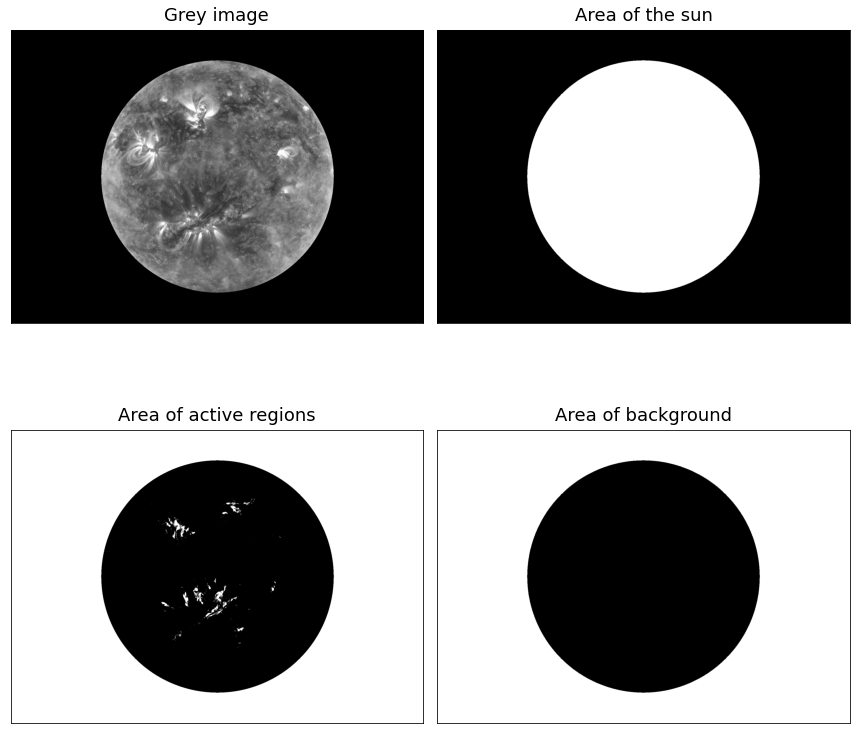

In [ ]:
#checking functionality of defined functions 
img = io.imread("frame20.jpg")
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(12,12))
ax = ax.flatten()

#original grey image 
ax[0].imshow(img_grey,cmap='gray')
ax[0].set_title("Grey image",fontsize=18,pad = 10)

ax[1].imshow(binary_whole(img),cmap='gray')
ax[1].set_title("Area of the sun",fontsize=18,pad = 10)

ax[2].imshow(binary_active(img),cmap='gray')
ax[2].set_title("Area of active regions",fontsize=18,pad = 10)
ax[3].imshow(remove_bg_active(img),cmap='gray')
ax[3].set_title("Area of background",fontsize=18,pad = 10)

for a in ax:
  a.get_xaxis().set_visible(False)
  a.get_yaxis().set_visible(False)

plt.tight_layout()
#os.chdir("/content")
#plt.savefig('thresholds_used')

In [ ]:
img = io.imread("frame20.jpg")
b_active = binary_active(img)
b_remove_bg = remove_bg_active(img)
b_whole = binary_whole(img)
intensity = intensity(b_active, b_remove_bg, b_whole)
print(np.sum(b_active))
print(np.sum(b_remove_bg))
print(np.sum(b_whole))
print(intensity)

1782602
1772244
956076
1.083386676373008


In [ ]:
files = glob.glob("*.jpg")
length = len(files)
#print(length)
intensity_lst_F1 = [0]*length
frame_no = [0]*length
for i in files: 
  img = io.imread(i)
  b_active = binary_active(img)
  b_whole = binary_whole(img)
  b_remove_bg = remove_bg_active(img)
  intensity_img = intensity(b_active,b_remove_bg, b_whole)

  #get the frame number
  split_string = i.split(".")
  frame_int = split_string[0][5:] 
  
  #append values into list 
  intensity_lst_F1[int(frame_int)]=intensity_img
  frame_no[int(frame_int)]= int(frame_int)

print(intensity_lst_F1)
print(frame_no)

[0.16613419869859797, 0.118807063829698, 0.17561047166499894, 0.08834653640705221, 0.14203577624386127, 0.18372956349040082, 0.25376030442854686, 0.4387610319005573, 0.5348819919223186, 0.5208944342958656, 0.5245562957755775, 0.5158642925185022, 0.7912475891920416, 0.7976648194832984, 0.967169002866655, 0.9764032394647786, 0.9554830340512543, 0.9123203532507757, 1.0159508894279574, 1.0114871781988557, 1.083386676373008, 0.9251470065080462, 0.8792887828412058, 1.064715281205297, 1.112275286303444, 1.4377040232709386, 0.9096841937926448, 0.8112740231374557, 1.0401499337820335, 0.7717138635572244, 0.7350091053366781, 0.5759017863300918, 0.3947140100476458, 0.30406407594185697, 0.19118301542627544, 0.2635698773699865, 0.2697461378681596, 0.35241609749830527, 0.420947712213439, 0.5225078287418985, 0.5451179052434704, 0.932725513996628, 0.8628087164037006, 0.751817684472527, 0.6232735437717031, 0.709091800982542, 0.9169217150945523, 0.8189446337877573, 0.9031184979120276, 0.8016755666360204,

Text(0.5, 1.0, 'Intensity over time')

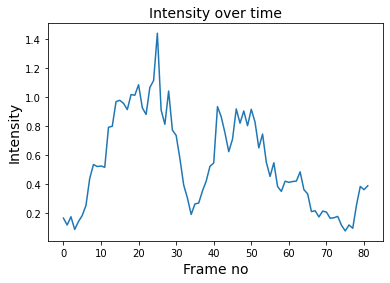

In [ ]:
plt.plot(frame_no,intensity_lst_F1)
plt.xlabel("Frame no", fontsize = 14)
plt.ylabel("Intensity", fontsize = 14)
plt.title("Intensity over time", fontsize = 14)

Trial frame 2

In [ ]:
path = "/content/F2_JHV_2022-04-06_23.50.24"
if (os.path.exists(path)==False):
  os.mkdir(path)

In [ ]:
#splitting video into image frames 
import cv2
vidcap = cv2.VideoCapture("/content/F2_JHV_2022-04-06_23.50.24.mp4")
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite(os.path.join(path , "frame%d.jpg" % count), image)  # save frame as JPEG file into designated folder        
  success,image = vidcap.read()
  #print('Read a new frame: ', success)
  count += 1

In [ ]:
#change path to folder with all images 
os.getcwd()
os.chdir(path)
os.getcwd()

'/content/F2_JHV_2022-04-06_23.50.24'

In [ ]:
files = glob.glob("*.jpg")
length = len(files)
#print(length)
intensity_lst_F2 = [0]*length
frame_no = [0]*length
for i in files: 
  img = io.imread(i)
  b_active = binary_active(img)
  b_whole = binary_whole(img)
  b_remove_bg = remove_bg_active(img)
  intensity_img = intensity(b_active,b_remove_bg, b_whole)

  #get the frame number
  split_string = i.split(".")
  frame_int = split_string[0][5:] 
  
  #append values into list 
  intensity_lst_F2[int(frame_int)]=intensity_img
  frame_no[int(frame_int)]= int(frame_int)

print(intensity_lst_F2)
print(frame_no)

[0.2683772508889667, 0.36170064684308095, 0.3495688650664181, 0.39163128030950894, 0.4783135020224985, 0.576477361638052, 0.6611427330185436, 0.6052426242645353, 0.716912016685418, 0.5947027171798438, 0.7311145437387642, 0.6030238710568575, 0.6880371170981178, 0.6931036555339155, 0.9030478391807193, 0.7984629693289832, 1.034462032290822, 1.0278306204313366, 1.1234699128556846, 1.3160267381201696, 1.3464878379532625, 1.2073514617083247, 1.0539259109277586, 0.954153594685086, 0.6706249604522158, 0.4896558488194158, 0.36501277175575253, 0.49027930839928924, 0.538277953489157, 0.5778493541776747, 0.5372442974481423, 0.513683819698034, 0.5610339310030579, 0.5218795033299304, 0.35063365112584627, 0.559170726921945, 0.5299126904752862, 0.5866962072057815, 0.5435522277517596, 0.39898317854840193, 0.45861103958870625, 0.3456154329163083, 0.4094697261512906, 0.3160773064936737, 0.34891084093211755, 0.3964676798618485, 0.3955201824016213, 0.3209113883428938, 0.31819933382953003, 0.220681790584595

Text(0.5, 1.0, 'Intensity over time')

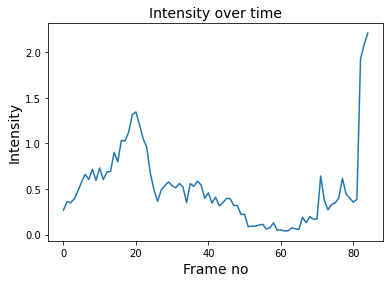

In [ ]:
plt.plot(frame_no,intensity_lst_F2)
plt.xlabel("Frame no", fontsize = 14)
plt.ylabel("Intensity", fontsize = 14)
plt.title("Intensity over time", fontsize = 14)

Main Loop

In [ ]:
def image_analysis(video_path):
  #create new folder
  path = video_path[0:len(video_path)-4]
  if (os.path.exists(path)==False):
    os.mkdir(path)
  
  #create image frames from video
  vidcap = cv2.VideoCapture(video_path)
  success,image = vidcap.read()
  count = 0
  while success:
    cv2.imwrite(os.path.join(path , "frame%d.jpg" % count), image)  # save frame as JPEG file into designated folder        
    success,image = vidcap.read()
    #print('Read a new frame: ', success)
    count += 1

  #change directory to folder
  os.chdir(path)

  files = glob.glob("*.jpg")
  length = len(files)
  #print(length)
  intensity_lst = [0]*length
  frame_no = [0]*length
  for i in files: 
    img = io.imread(i)
    b_active = binary_active(img)
    b_whole = binary_whole(img)
    b_remove_bg = remove_bg_active(img)
    intensity_img = intensity(b_active,b_remove_bg, b_whole)
    #print(intensity_img)

    #get the frame number
    split_string = i.split(".")
    frame_int = split_string[0][5:] 
    
    #append values into list 
    intensity_lst[int(frame_int)]=intensity_img
    frame_no[int(frame_int)]= int(frame_int)

  return intensity_lst

Trial Frame 3

In [ ]:
intensity_lst_F3 = image_analysis('/content/F3_JHV_2022-04-06_23.54.20.mp4')

[2.226171486756968, 2.1291573774726196, 2.3906891955838465, 2.5503548982737887, 2.650144689069384, 2.491358714990088, 2.4662762903019115, 1.9166303909201543, 2.085109853849519, 1.9856303208281953, 2.190144508639898, 1.88116640158182, 2.2512904254721673, 1.7992420227986656, 1.592236179226734, 1.7563200066144227, 1.7145334643561703, 1.6160630989737936, 1.375254328218319, 1.4892123556381187, 1.4721118474144723, 1.2482009848580462, 1.2410369553226697, 1.3130955235090562, 1.5956922038947112, 1.3487046621129848, 1.4752351908797083, 1.4798456588364137, 1.2455878576143549, 1.2737474286223784, 1.2953483385103388, 1.4744023245617295, 1.4177717847169873, 1.5924811359422684, 1.593508298880774, 2.170191071978588, 2.3518752011591015, 2.1382000065869224, 1.8866040065366005, 2.150069175399485, 2.2606056548615294, 2.247305645683241, 2.116873978234943, 2.0855590529250874, 3.1407172737855404, 3.459736702766726, 3.8692375094641385, 4.179388277932511, 4.023533090217624, 4.450606195005578, 3.494562748846120

Text(0.5, 1.0, 'Intensity over time')

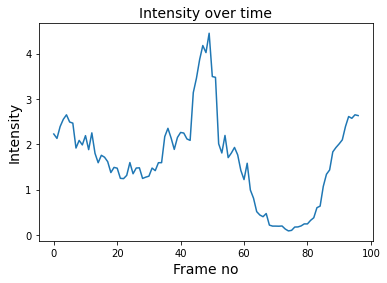

In [ ]:
frames = [*range(0,len(intensity_lst_F3))]
print(intensity_lst_F3)
print(frames)

plt.plot(frames, intensity_lst_F3)
plt.xlabel("Frame no", fontsize = 14)
plt.ylabel("Intensity", fontsize = 14)
plt.title("Intensity over time", fontsize = 14)

Frame 4

In [ ]:
intensity_lst_F4 = image_analysis('/content/F4_JHV_2022-04-07_00.02.11.mp4')

/usr/local/lib/python3.7/dist-packages/skimage/filters/thresholding.py:701: RuntimeWarning: divide by zero encountered in log
  (np.log(mean_back) - np.log(mean_fore)))


[2.7013636300403108, 2.6862716770738024, 2.936952170981517, 3.2595174526776907, 2.706328363130639, 2.2488153561962894, 2.4770474194477674, 2.1964016626165113, 1.905404609262443, 1.84125324356697, 1.9731575986498433, 1.7418062437499797, 1.746225890237536, 1.9065702320734366, 2.055570090972648, 2.027037171284748, 2.0345469679157695, 2.1692234583356127, 2.34185051899253, 2.4511455706390515, 2.7248927420990885, 2.6706833561115126, 2.3308303777841486, 2.1384005755951936, 3.003829969132554, 3.0080478142428695, 1.8479606043417727, 1.9609697081699728, 2.976177683019614, 2.5089632699384397, 2.2318962088721204, 2.633743263248541, 2.8055702806538014, 2.3915830042756, 2.8911643273577083, 2.192024250169151, 2.448391226239525, 1.883556300633017, 1.9971977461442105, 2.573714595683676, 3.249393974622284, 4.35946298030856, 3.956245362807482, 3.6053257630502844, 4.678411705400305, 4.360703142507456, 4.128270333175294, 4.5284080255015935, 4.21321066268878, 3.9626308453978965, 3.963210846568833, 3.5384985

Text(0.5, 1.0, 'Intensity over time')

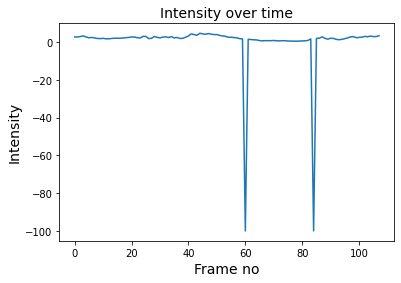

In [ ]:
frames = [*range(0,len(intensity_lst_F4))]
print(intensity_lst_F4)
print(frames)

plt.plot(frames, intensity_lst_F4)
plt.xlabel("Frame no", fontsize = 14)
plt.ylabel("Intensity", fontsize = 14)
plt.title("Intensity over time", fontsize = 14)

Frame 5

In [ ]:
intensity_lst_F5 = image_analysis('/content/F5_JHV_2022-04-07_00.06.28.mp4')

/usr/local/lib/python3.7/dist-packages/skimage/filters/thresholding.py:701: RuntimeWarning: divide by zero encountered in log
  (np.log(mean_back) - np.log(mean_fore)))


[3.4157968632658173, 3.298545530944888, 2.8055678038530423, 3.133034451291556, 2.8445181190042605, 2.9980891539331402, 3.574304672422605, 3.686464690496948, 3.5420608829864233, 3.1573737644620756, 4.1170512148130545, 4.5785910031221135, 3.739636812615684, 3.568588219764203, 3.884508880155542, 4.040040289094991, 3.6665866276658443, 3.9993145279684597, 3.727656712784296, 3.2389481798864845, 3.4417160092868238, 3.385391066517244, 3.2194033780248135, 3.0211714728688945, 3.4508532881947143, 3.5883316099781175, 3.4609237147123966, 3.6680604822660294, 4.321404825643448, 4.098106959158921, 3.894754343669465, 4.358795103480493, 3.2805719500265886, 3.4415062129643306, 3.5247208756858397, 3.5197537310900264, 3.812220390090723, 3.2459092148473903, 3.122638389033582, 3.2679946192506386, 2.7803036444787232, 2.835146436179072, 2.2637551483852865, 2.343836494878133, -100.0, -100.0, 1.8684362908956913, 1.6557715087965603, 1.7590897272889834, 1.7521105866190891, 2.305109894391199, 2.7201685837211347, 3.

Text(0.5, 1.0, 'Intensity over time')

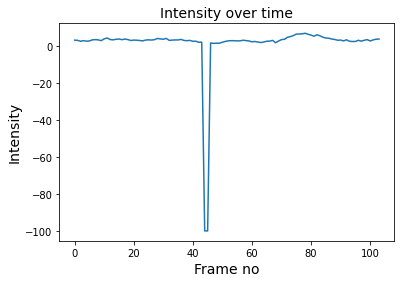

In [ ]:
frames = [*range(0,len(intensity_lst_F5))]
print(intensity_lst_F5)
print(frames)

plt.plot(frames, intensity_lst_F5)
plt.xlabel("Frame no", fontsize = 14)
plt.ylabel("Intensity", fontsize = 14)
plt.title("Intensity over time", fontsize = 14)

Frame 6

In [ ]:
intensity_lst_F6 = image_analysis('/content/F6_JHV_2022-04-07_00.09.13.mp4')

[4.534594584425658, 4.534719778310458, 4.39873382696373, 4.683401401201979, 4.769617035785688, 5.015223480696626, 5.02631031107292, 5.0835593665237555, 5.722511847816214, 4.998792348140549, 5.378961726533249, 4.857517116342367, 5.074457143363805, 4.696489022792421, 4.466801920156096, 4.567394319891689, 3.445775036012469, 3.209291027849348, 2.7131782945736433, 2.9573915928197128, 3.0365205850661865, 3.193725528495707, 3.069795217486378, 2.6496249315862337, 2.4488871420101392, 2.4198303498160585, 2.396986442545177, 2.3013056541321646, 2.3306755648961293, 2.3083922244799786, 2.2729343475758403, 2.163863305003378, 1.8656210475307695, 2.280742900397149, 1.7967872825301539, 1.790778939363449, 1.9201901843355889, 1.6183130043327016, 1.2810088793035368, 1.3020311909052482, 1.5088949602641346, 1.3704010289411963, 1.4558844640001602, 1.303446364717915, 1.2969477035420887, 1.249355672255108, 1.552038038182942, 1.349337693029016, 1.6232580104786682, 1.5933964943940382, 1.5797401115844638, 1.347195

Text(0.5, 1.0, 'Intensity over time')

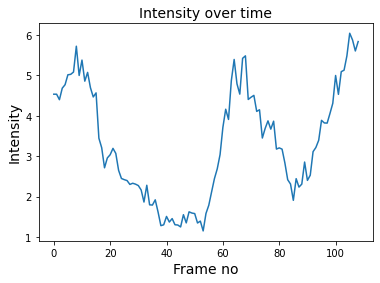

In [ ]:
frames = [*range(0,len(intensity_lst_F6))]
print(intensity_lst_F6)
print(frames)

plt.plot(frames, intensity_lst_F6)
plt.xlabel("Frame no", fontsize = 14)
plt.ylabel("Intensity", fontsize = 14)
plt.title("Intensity over time", fontsize = 14)

Frame 7

In [ ]:
intensity_lst_F7 = image_analysis('/content/F7_JHV_2022-04-07_00.12.23.mp4')

[6.549901125953427, 6.550914558260623, 5.484067356496332, 5.849748032590925, 5.653866770734508, 4.935387679530068, 4.39024663802869, 3.719789260921406, 3.2940775259193775, 2.8697849119768084, 2.5052030449733818, 2.246621147771837, 1.9474719000251373, 1.7717609189003545, 1.8568612837182572, 1.7772534457928157, 1.3768383570439904, 1.0233317391138383, 1.1595738947670973, 1.343444630207462, 1.3942740107189657, 1.3936773541467797, 1.621009669003146, 2.21587016341888, 2.2279007076266426, 2.0797038205220657, 1.8537572760787466, 1.8150343302897405, 1.834117163292041, 2.0999165246387133, 2.8342655786850286, 2.5745613739384092, 2.6094109608745684, 2.5939012247448354, 2.1846733442428383, 1.9960075353274673, 1.8712998047544596, 1.922030621192023, 1.6424311578521362, 2.020940159889914, 1.574943025244286, 1.6752810593173173, 1.7299271550434843, 1.8297037274449937, 1.9212688044338875, 2.69211260604193, 2.790611363534122, 3.923908544486035, 3.9548219604596544, 5.127720536868358, 5.228527298519232, 4.9

Text(0.5, 1.0, 'Intensity over time')

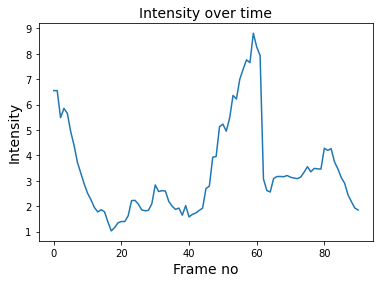

In [ ]:
frames = [*range(0,len(intensity_lst_F7))]
print(intensity_lst_F7)
print(frames)

plt.plot(frames, intensity_lst_F7)
plt.xlabel("Frame no", fontsize = 14)
plt.ylabel("Intensity", fontsize = 14)
plt.title("Intensity over time", fontsize = 14)

Frame 8

In [ ]:
intensity_lst_F8 = image_analysis('/content/F8_JHV_2022-04-07_00.21.32.mp4')

/usr/local/lib/python3.7/dist-packages/skimage/filters/thresholding.py:701: RuntimeWarning: divide by zero encountered in log
  (np.log(mean_back) - np.log(mean_fore)))


[1.8748612393062698, 1.7580735688251032, 1.9986002810707737, 1.998419838354648, 2.100110567727523, 2.4729972058884857, 2.182705183755732, 2.2742489241360966, 2.2573518637495913, 2.3245905704399186, 2.5172168934074235, 2.6767931233874482, 2.707034728406055, 2.3757215594815255, 2.504151040380915, 2.790029746640681, 2.969150859600792, 2.491503931016992, 2.2678906362718223, 2.028681987923492, 1.9933992952936166, 1.9127419951127582, 1.9476589207399753, 2.002177554061274, 1.9132079427322555, 1.6560867075738381, 1.441039126156579, 1.3466935674755696, 1.341356752881984, 1.3020034984581537, 1.2362014981391607, 1.2334644866143631, 1.6502036975471774, 1.9711900393539286, 1.7845510955239154, 2.424107188137089, 3.277554130020241, 4.521337738970505, 4.8390350328556275, 5.790650397342337, 6.124895769950195, 6.6079543341847975, 7.098526163969892, 7.2726453255811325, 7.582209431646983, -100.0, 8.267812354225681, 8.563020182547668, 9.293571821287259, 9.041440357453078, 8.816093948208618, 7.8519226197785

Text(0.5, 1.0, 'Intensity over time')

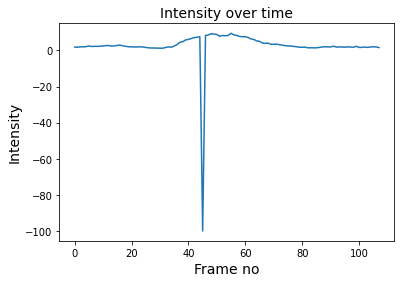

In [ ]:
frames = [*range(0,len(intensity_lst_F8))]
print(intensity_lst_F8)
print(frames)

plt.plot(frames, intensity_lst_F8)
plt.xlabel("Frame no", fontsize = 14)
plt.ylabel("Intensity", fontsize = 14)
plt.title("Intensity over time", fontsize = 14)

All frames 

In [ ]:
final_lst = [*intensity_lst_F1,*intensity_lst_F2,*intensity_lst_F3,*intensity_lst_F4,*intensity_lst_F5,*intensity_lst_F6,*intensity_lst_F7,*intensity_lst_F8]
#print(len(final_lst))
frames = [*range(0,784)]
print(final_lst)
print(frames)

[0.16613419869859797, 0.118807063829698, 0.17561047166499894, 0.08834653640705221, 0.14203577624386127, 0.18372956349040082, 0.25376030442854686, 0.4387610319005573, 0.5348819919223186, 0.5208944342958656, 0.5245562957755775, 0.5158642925185022, 0.7912475891920416, 0.7976648194832984, 0.967169002866655, 0.9764032394647786, 0.9554830340512543, 0.9123203532507757, 1.0159508894279574, 1.0114871781988557, 1.083386676373008, 0.9251470065080462, 0.8792887828412058, 1.064715281205297, 1.112275286303444, 1.4377040232709386, 0.9096841937926448, 0.8112740231374557, 1.0401499337820335, 0.7717138635572244, 0.7350091053366781, 0.5759017863300918, 0.3947140100476458, 0.30406407594185697, 0.19118301542627544, 0.2635698773699865, 0.2697461378681596, 0.35241609749830527, 0.420947712213439, 0.5225078287418985, 0.5451179052434704, 0.932725513996628, 0.8628087164037006, 0.751817684472527, 0.6232735437717031, 0.709091800982542, 0.9169217150945523, 0.8189446337877573, 0.9031184979120276, 0.8016755666360204,

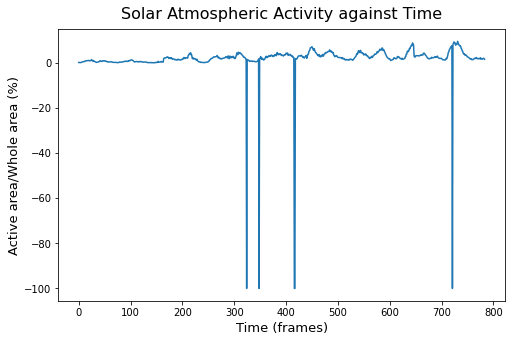

In [ ]:
plt.figure(figsize=(8, 5))
#plt.figure(facecolor='#94F008')

plt.plot(frames,final_lst)
plt.xlabel("Time (frames)", fontsize=13)
plt.ylabel("Active area/Whole area (%)", fontsize=13)
plt.title("Solar Atmospheric Activity against Time", fontsize=16,pad = 10)
os.chdir("/content")
plt.savefig("original figure")

Manually delete bad frames (when video glitches)

In [ ]:
count = 0
frames_to_delete = []
for i in final_lst: 
  if (i==-100):
    frames_to_delete.append(count)
  count+=1

print(frames_to_delete)

[324, 348, 416, 417, 721]


In [ ]:
del final_lst[324]
del final_lst[348]
del final_lst[416]
del final_lst[417]
del final_lst[721]

Text(0.5, 1.0, 'Intensity over time')

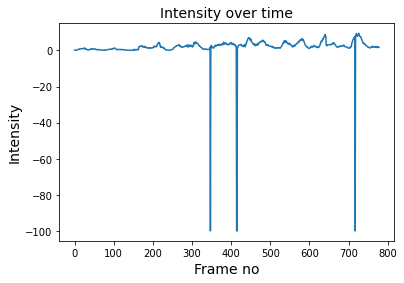

In [ ]:
frames = frames[0:len(frames)-5]
plt.plot(frames,final_lst)
plt.xlabel("Frame no", fontsize = 14)
plt.ylabel("Intensity", fontsize = 14)
plt.title("Intensity over time", fontsize = 14)

In [ ]:
count = 0
frames_to_delete = []
for i in final_lst: 
  if (i==-100):
    frames_to_delete.append(count)
  count+=1

print(frames_to_delete)

[347, 414, 415, 717]


In [ ]:
del final_lst[347]
del final_lst[414]
del final_lst[415]
del final_lst[717]

Text(0.5, 1.0, 'Intensity over time')

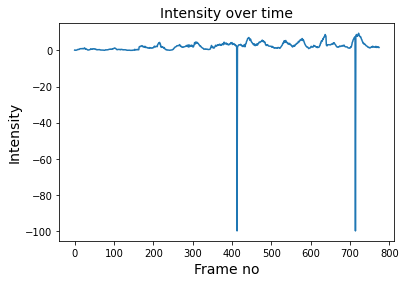

In [ ]:
frames = frames[0:len(frames)-4]
plt.plot(frames,final_lst)
plt.xlabel("Frame no", fontsize = 14)
plt.ylabel("Intensity", fontsize = 14)
plt.title("Intensity over time", fontsize = 14)

In [ ]:
count = 0
frames_to_delete = []
for i in final_lst: 
  if (i==-100):
    frames_to_delete.append(count)
  count+=1

print(frames_to_delete)

[413, 714]


In [ ]:
del final_lst[413]
del final_lst[714]

Text(0.5, 1.0, 'Intensity over time')

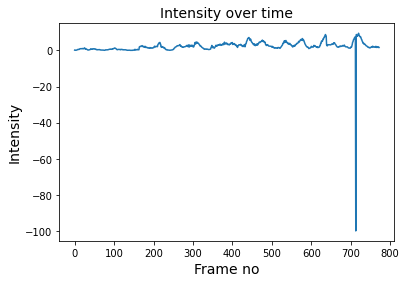

In [ ]:
frames = frames[0:len(frames)-2]
plt.plot(frames,final_lst)
plt.xlabel("Frame no", fontsize = 14)
plt.ylabel("Intensity", fontsize = 14)
plt.title("Intensity over time", fontsize = 14)

In [ ]:
count = 0
frames_to_delete = []
for i in final_lst: 
  if (i==-100):
    frames_to_delete.append(count)
  count+=1

print(frames_to_delete)

[713]


In [ ]:
del final_lst[713]

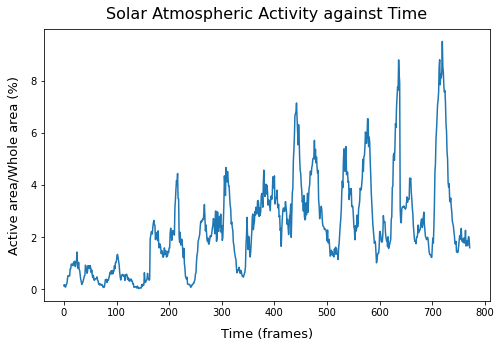

In [ ]:
#frames = frames[0:len(frames)-1]
plt.figure(figsize=(8, 5))
plt.plot(frames,final_lst)
plt.xlabel("Time (frames)", fontsize=13,labelpad = 10)
plt.ylabel("Active area/Whole area (%)", fontsize=13,labelpad = 10)
plt.title("Solar Atmospheric Activity against Time", fontsize=16,pad = 10)
os.chdir("/content")
plt.savefig("altered figure")

Illustration of broken frame

In [ ]:
intensity_lst_F5 = image_analysis('/content/F5_JHV_2022-04-07_00.06.28.mp4')

/usr/local/lib/python3.7/dist-packages/skimage/filters/thresholding.py:701: RuntimeWarning: divide by zero encountered in log
  (np.log(mean_back) - np.log(mean_fore)))


[3.4157968632658173, 3.298545530944888, 2.8055678038530423, 3.133034451291556, 2.8445181190042605, 2.9980891539331402, 3.574304672422605, 3.686464690496948, 3.5420608829864233, 3.1573737644620756, 4.1170512148130545, 4.5785910031221135, 3.739636812615684, 3.568588219764203, 3.884508880155542, 4.040040289094991, 3.6665866276658443, 3.9993145279684597, 3.727656712784296, 3.2389481798864845, 3.4417160092868238, 3.385391066517244, 3.2194033780248135, 3.0211714728688945, 3.4508532881947143, 3.5883316099781175, 3.4609237147123966, 3.6680604822660294, 4.321404825643448, 4.098106959158921, 3.894754343669465, 4.358795103480493, 3.2805719500265886, 3.4415062129643306, 3.5247208756858397, 3.5197537310900264, 3.812220390090723, 3.2459092148473903, 3.122638389033582, 3.2679946192506386, 2.7803036444787232, 2.835146436179072, 2.2637551483852865, 2.343836494878133, -100.0, -100.0, 1.8684362908956913, 1.6557715087965603, 1.7590897272889834, 1.7521105866190891, 2.305109894391199, 2.7201685837211347, 3.

Text(0.5, 1.0, 'Intensity over time')

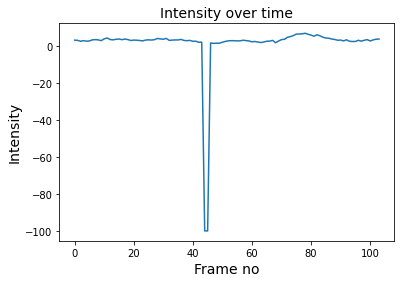

In [ ]:
frames = [*range(0,len(intensity_lst_F5))]
print(intensity_lst_F5)
print(frames)

plt.plot(frames, intensity_lst_F5)
plt.xlabel("Frame no", fontsize = 14)
plt.ylabel("Intensity", fontsize = 14)
plt.title("Intensity over time", fontsize = 14)

In [ ]:
count = 0
frames_to_delete = []
for i in intensity_lst_F5: 
  if (i==-100):
    frames_to_delete.append(count)
  count+=1

print(frames_to_delete)

[44, 45]


In [ ]:
path = "/content/F5_JHV_2022-04-07_00.06.28" 
os.getcwd()
os.chdir(path)
os.getcwd()

'/content/F5_JHV_2022-04-07_00.06.28'

/usr/local/lib/python3.7/dist-packages/skimage/filters/thresholding.py:701: RuntimeWarning: divide by zero encountered in log
  (np.log(mean_back) - np.log(mean_fore)))


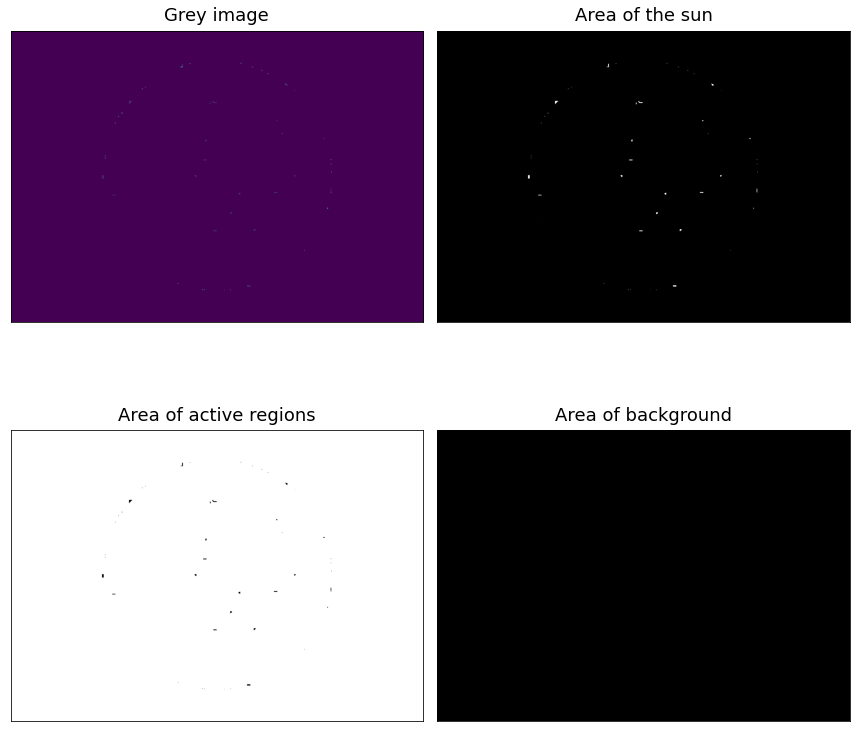

In [ ]:
#Suitable filters found 
img = io.imread("frame44.jpg")

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(12,12))
ax = ax.flatten()
img_grey = rgb2gray(img)

#original grey image 
ax[0].imshow(img_grey)
ax[0].set_title("Grey image",fontsize=18,pad = 10)

ax[1].imshow(binary_whole(img),cmap='gray')
ax[1].set_title("Area of the sun",fontsize=18,pad = 10)

ax[2].imshow(binary_active(img),cmap='gray')
ax[2].set_title("Area of active regions",fontsize=18,pad = 10)
ax[3].imshow(remove_bg_active(img),cmap='gray')
ax[3].set_title("Area of background",fontsize=18,pad = 10)

for a in ax:
  a.get_xaxis().set_visible(False)
  a.get_yaxis().set_visible(False)

plt.tight_layout()

In [ ]:
print("Area of the sun")
print(np.sum(binary_whole(img)))
print()

print("Area of active region + background")
print(np.sum(binary_active(img)))
print()

print("Area of background")
print(np.sum(remove_bg_active(img)))
print()

print("Actual area of active region")
actual_active = (np.sum(binary_active(img))-np.sum(remove_bg_active(img)))
print(actual_active)
print()

print("Atmospheric activity level")
print((np.sum(binary_active(img))-np.sum(remove_bg_active(img)))/np.sum(binary_whole(img))*100)

Area of the sun


/usr/local/lib/python3.7/dist-packages/skimage/filters/thresholding.py:701: RuntimeWarning: divide by zero encountered in log
  (np.log(mean_back) - np.log(mean_fore)))


1443

Area of active region + background
2711197

Area of background
2712640

Actual area of active region
-1443

Atmospheric activity level
-100.0
